In [ ]:
!pip install tensorflow pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [21]:
# Load data from Data.xlsx
def load_data():
    df = pd.read_excel('https://raw.githubusercontent.com/george-bobby/flood-prediction/main/notebooks/data.xlsx')

    # Extract features (X) and target (y)
    X = df[['Temp (°C)', 'Wind (Bft)', 'Atm (inHg)', 'Rate (inHg/3h)']].values
    y = df['Flood Intensity (mm/h)'].values

    #Print first 5 rows
    print(df.head())

    # Normalize features (0-1 scaling)
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    return X, y

# Execute
X, y = load_data()
print("Data loaded successfully!")
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

   Temp (°C)  Wind (Bft)  Atm (inHg)  Rate (inHg/3h)  Flood Intensity (mm/h)  \
0      25.49        7.85       28.86            0.63                    78.1   
1      29.13       12.49       28.25            0.85                    84.7   
2      13.08        1.49       31.25            0.02                    13.9   
3      19.64        4.80       29.65            0.10                    35.2   
4      34.30        9.34       28.46            0.72                    81.0   

  Flood Risk Category  
0                High  
1           Very High  
2            Very Low  
3                 Low  
4           Very High  
Data loaded successfully!
Features shape: (94, 4), Target shape: (94,)


In [ ]:
# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Data split complete:")
print(f"Train: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

Data split complete:
Train: 65 samples
Validation: 14 samples
Test: 15 samples


In [ ]:
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

# Initialize model
model = create_model((X_train.shape[1],))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 3000.8855 - mae: 49.3765 - mse: 3000.8855 - val_loss: 2997.9468 - val_mae: 47.2671 - val_mse: 2997.9468
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 2948.5488 - mae: 48.6532 - mse: 2948.5488 - val_loss: 2991.6228 - val_mae: 47.1990 - val_mse: 2991.6228
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 3121.5540 - mae: 50.7160 - mse: 3121.5540 - val_loss: 2985.2642 - val_mae: 47.1308 - val_mse: 2985.2642
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 3065.9683 - mae: 49.5503 - mse: 3065.9683 - val_loss: 2978.5818 - val_mae: 47.0599 - val_mse: 2978.5818
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 3041.3435 - mae: 49.6407 - mse: 3041.3435 - val_loss: 2971.1543 - val_mae: 46.9836 - val_mse: 2971.1543
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 2933.8599 - mae: 49.0330 - mse: 2933.8599 - val_loss: 2963.3992 - val_mae: 46.9038 - val_mse: 2963.3992
Epoch 7/200
3/3 ━━━━━━━

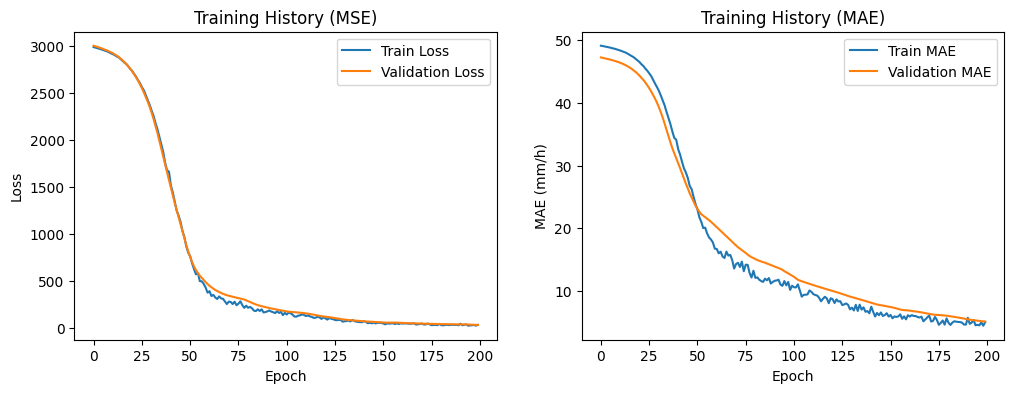

In [ ]:
# Train with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training History (MAE)')
plt.ylabel('MAE (mm/h)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Test Set Evaluation:
- MSE: 29.5307
- MAE: 4.1984 mm/h
- R² Score: 0.9452
- Accuracy: 90.68%


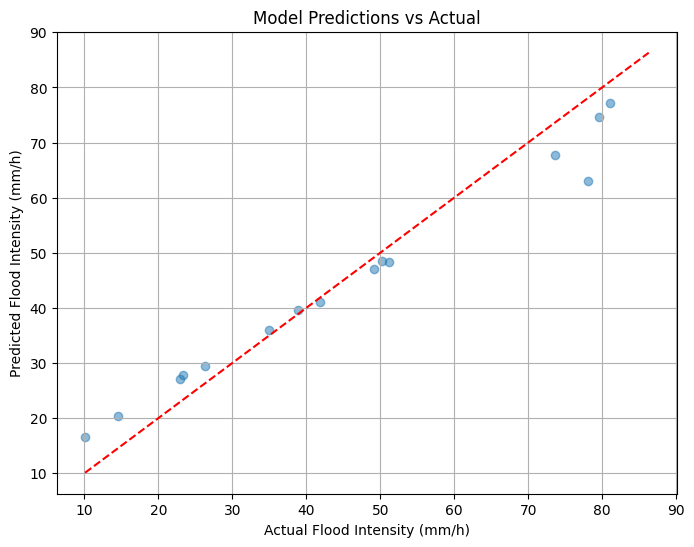

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = 100 * (1 - (mae / np.mean(y_test)))

print("\nTest Set Evaluation:")
print(f"- MSE: {mse:.4f}")
print(f"- MAE: {mae:.4f} mm/h")
print(f"- R² Score: {r2:.4f}")
print(f"- Accuracy: {accuracy:.2f}%")

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Flood Intensity (mm/h)')
plt.ylabel('Predicted Flood Intensity (mm/h)')
plt.title('Model Predictions vs Actual')
plt.grid()
plt.show()

In [ ]:
# Show 5 random test samples
sample_idx = np.random.choice(len(X_test), 5, replace=False)

print("Example Predictions:")
print("-" * 40)
for idx in sample_idx:
    print(f"\nInput Features:")
    print(f"Temp: {X_test[idx][0]:.2f} | Wind: {X_test[idx][1]:.2f}")
    print(f"Atm: {X_test[idx][2]:.2f} | Rate: {X_test[idx][3]:.2f}")
    print(f"True Value: {y_test[idx]:.2f} mm/h")
    print(f"Predicted: {y_pred[idx][0]:.2f} mm/h")
    print(f"Error: {abs(y_test[idx] - y_pred[idx][0]):.2f} mm/h")
print("-" * 40)

Example Predictions:
----------------------------------------

Input Features:
Temp: 0.51 | Wind: 0.44
Atm: 0.40 | Rate: 0.23
True Value: 50.30 mm/h
Predicted: 48.53 mm/h
Error: 1.77 mm/h

Input Features:
Temp: 0.50 | Wind: 0.44
Atm: 0.41 | Rate: 0.24
True Value: 51.20 mm/h
Predicted: 48.32 mm/h
Error: 2.88 mm/h

Input Features:
Temp: 0.11 | Wind: 0.05
Atm: 0.94 | Rate: 0.02
True Value: 14.60 mm/h
Predicted: 20.32 mm/h
Error: 5.72 mm/h

Input Features:
Temp: 0.22 | Wind: 0.16
Atm: 0.76 | Rate: 0.06
True Value: 22.90 mm/h
Predicted: 27.02 mm/h
Error: 4.12 mm/h

Input Features:
Temp: 0.37 | Wind: 0.28
Atm: 0.53 | Rate: 0.11
True Value: 34.90 mm/h
Predicted: 36.08 mm/h
Error: 1.18 mm/h
----------------------------------------


In [ ]:
# Bin flood intensity into categories
bins = [0, 20, 50, 100]  # Define your thresholds
labels = ["Low", "Medium", "High"]
y_category = pd.cut(y, bins=bins, labels=labels)

# Encode labels to integers (0=Low, 1=Medium, 2=High)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_category)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
classification_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Correct way to specify input shape
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])

classification_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'sparse' since labels are integers
    metrics=['accuracy']
)

history = classification_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.5000 - loss: 1.0633 - val_accuracy: 0.4615 - val_loss: 1.0822
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6162 - loss: 1.0407 - val_accuracy: 0.5385 - val_loss: 1.0690
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6106 - loss: 1.0320 - val_accuracy: 0.6154 - val_loss: 1.0562
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7268 - loss: 1.0174 - val_accuracy: 0.6154 - val_loss: 1.0430
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7292 - loss: 1.0089 - val_accuracy: 0.6923 - val_loss: 1.0309
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7732 - loss: 0.9829 - val_accuracy: 0.6923 - val_loss: 1.0196
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7756 - loss: 0.9833 - val_accuracy: 0.6923 - val_loss: 1.0089
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7965 - loss: 0.9573 - val_accuracy: 0.6923 - val_loss: 0.9991

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


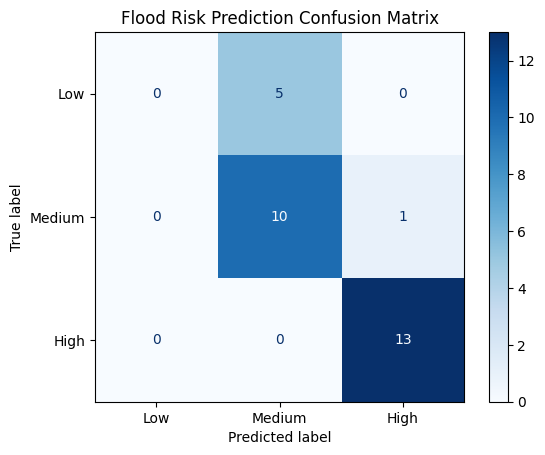


Classification Report:
              precision    recall  f1-score   support

         Low       0.93      1.00      0.96        13
      Medium       0.00      0.00      0.00         5
        High       0.67      0.91      0.77        11

    accuracy                           0.79        29
   macro avg       0.53      0.64      0.58        29
weighted avg       0.67      0.79      0.72        29



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict classes
y_pred_probs = classification_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Decode labels back to original strings
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Plot confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Flood Risk Prediction Confusion Matrix")
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, target_names=labels))